<a href="https://colab.research.google.com/github/leandrohfer/mba-ia-and-analytics-FGV/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cálculo de Matriz Identidade

In [54]:
import numpy as np

# Declaração de uma matriz
A = np.array([
    [2,3],
    [1,7]
])

# Método para obter a inversa de uma matriz
A_inv = np.linalg.inv(A)

# Multiplicando a matriz A pela sua inversa para obter a matriz Identidade
print(A_inv @ A)

[[1.00000000e+00 2.22044605e-16]
 [0.00000000e+00 1.00000000e+00]]


## Algoritmo Análise de Componente Principal

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Bibliotecas de aprendizado de máquina
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [56]:
# Importação do dataset via url

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
dados = pd.read_csv(url)
dados

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


## Padronização e Centralização dos dados

In [57]:
# Cria uma cópia dos dados excluindo a coluna Channel e Region resetando os índices das colunas
dados = dados.drop(columns = ['Channel', 'Region'], axis=1).copy()

# Salvar o nome das colunas restantes para utilização posterior
nomes_colunas = dados.columns

# Instancia um objeto Scaler
scaler = StandardScaler()

# Normaliza a base usando fit_transform basicamente executa dois métodos do StandardScaler
# fit() = obtém a média e o desvio padrão das colunas.
# transform() = subtrai o valor da coluna pela média e divide pelo desvio padrão.
dados_centralizados = scaler.fit_transform(dados)

## Execução do Método


### Um Componente Principal

In [58]:
# Instancia um componente principal de um componente
pca = PCA(n_components=1)

# Rodar análise de componente principal para a base e projeta os dados nessa direção
dados_pca = pca.fit_transform(dados_centralizados)

# Calcular a parcela da variância que está sendo explicada por esse componente principal

variancia_pca = pca.explained_variance_ratio_[0]

# Encontrar os pesos de cada variável na construção do nosso componente principal

print("Pesos do primeiro componente principal")
for i, feature in enumerate(nomes_colunas):
    print(f"{feature}: {pca.components_[0][i]:.4f}")

Pesos do primeiro componente principal
Fresh: 0.0429
Milk: 0.5451
Grocery: 0.5793
Frozen: 0.0512
Detergents_Paper: 0.5486
Delicassen: 0.2487


### Dois Componentes Principais

A primeira parcela da variância é: 0.4408
A segunda parcela da variância é: 0.2838

A soma das variâncias é: 0.7246

Pesos do primeiro componente principal
Fresh: 0.0429
Milk: 0.5451
Grocery: 0.5793
Frozen: 0.0512
Detergents_Paper: 0.5486
Delicassen: 0.2487

Pesos do segundo componente principal
Fresh: 0.5279
Milk: 0.0832
Grocery: -0.1461
Frozen: 0.6113
Detergents_Paper: -0.2552
Delicassen: 0.5042


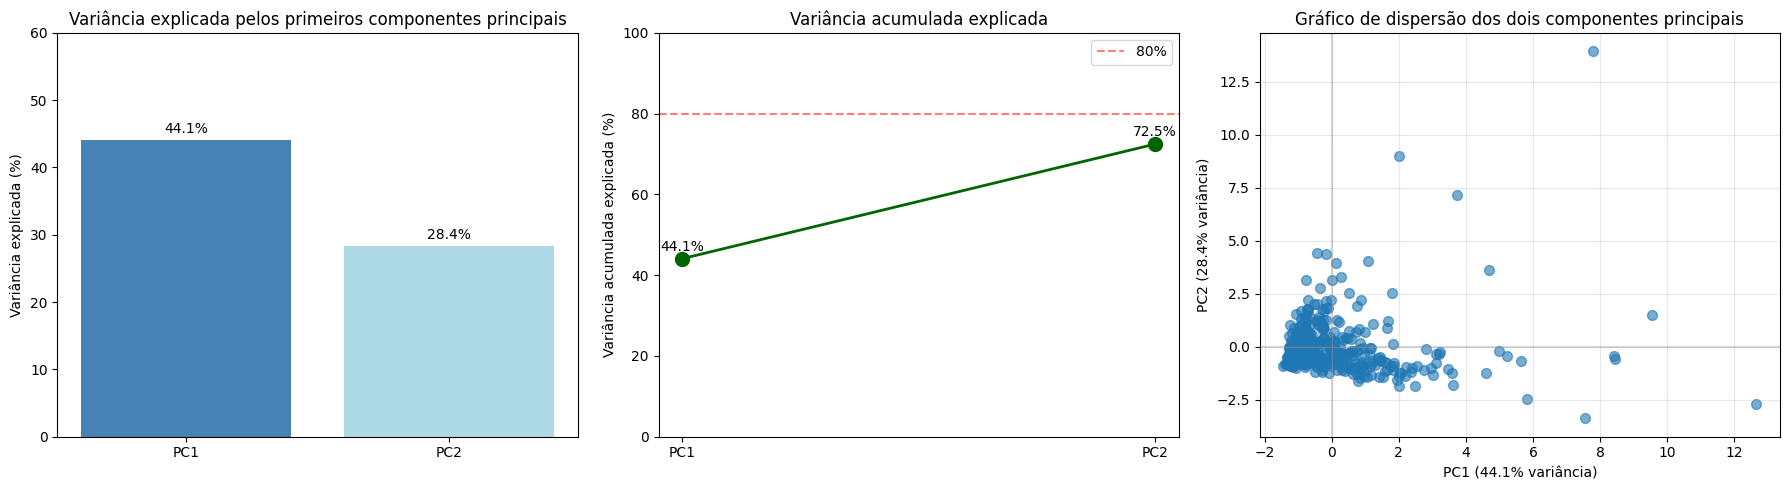

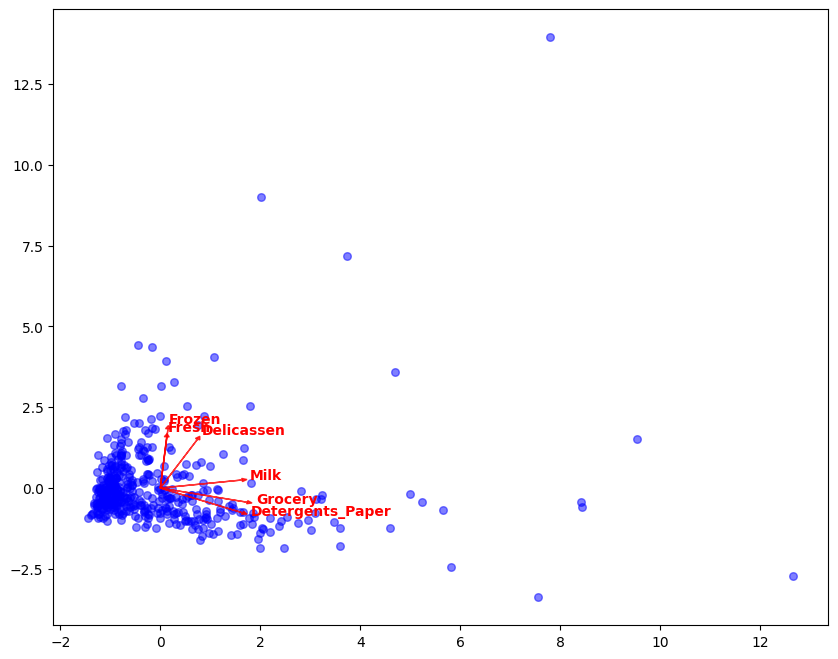

In [59]:
pca = PCA(n_components=2)

dados_pca = pca.fit_transform(dados_centralizados)

variancia_pca_1 = pca.explained_variance_ratio_[0]
variancia_pca_2 = pca.explained_variance_ratio_[1]

print(f"A primeira parcela da variância é: {variancia_pca_1:.4f}")
print(f"A segunda parcela da variância é: {variancia_pca_2:.4f}\n")

print(f"A soma das variâncias é: {variancia_pca_2+variancia_pca_1:.4f}\n")

print("Pesos do primeiro componente principal")
for i, feature in enumerate(nomes_colunas):
    print(f"{feature}: {pca.components_[0][i]:.4f}")

print("\nPesos do segundo componente principal")
for i, feature in enumerate(nomes_colunas):
    print(f"{feature}: {pca.components_[1][i]:.4f}")


# Primeiro gráfico que representa a decomposição acima

fig, axes = plt.subplots(1, 3, figsize = (18,5))

axes[0].bar(['PC1','PC2'],
            [variancia_pca_1 * 100, variancia_pca_2 * 100],
            color = ['steelblue', 'lightblue'])
axes[0].set_ylabel('Variância explicada (%)')
axes[0].set_title('Variância explicada pelos primeiros componentes principais')
axes[0].set_ylim(0,60)
axes[0].text(0, variancia_pca_1 * 100 + 1, f'{variancia_pca_1 * 100:.1f}%', ha='center')
axes[0].text(1, variancia_pca_2 * 100 + 1, f'{variancia_pca_2 * 100:.1f}%', ha='center')

# Segundo gráfico sobre a mesma decomposição

variancia_acumulada = [variancia_pca_1 * 100, (variancia_pca_1 + variancia_pca_2) * 100]
axes[1].plot(['PC1', 'PC2'], variancia_acumulada, 'o-', color = 'darkgreen', linewidth = 2, markersize = 10)
axes[1].set_ylabel('Variância acumulada explicada (%)')
axes[1].set_title('Variância acumulada explicada')
axes[1].set_ylim(0, 100)
axes[1].axhline(y = 80, color = 'red', linestyle='--', alpha = 0.5, label = '80%')
axes[1].legend()
axes[1].text(0, variancia_acumulada[0] + 2, f'{variancia_acumulada[0]:.1f}%', ha='center')
axes[1].text(1, variancia_acumulada[1] + 2, f'{variancia_acumulada[1]:.1f}%', ha='center')

# Último gráfico demonstrando um scatterplot dos dois componentes principais

axes[2].scatter(dados_pca[:, 0], dados_pca[:, 1], alpha = 0.6, s = 50)
axes[2].set_xlabel(f'PC1 ({variancia_pca_1 * 100:.1f}% variância)')
axes[2].set_ylabel(f'PC2 ({variancia_pca_2 * 100:.1f}% variância)')
axes[2].set_title('Gráfico de dispersão dos dois componentes principais')
axes[2].axhline(y = 0, color = 'gray', linestyle = '-', alpha = 0.3)
axes[2].axvline(x = 0, color = 'gray', linestyle = '-', alpha = 0.3)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Agora plotamos as contribuições das duas features
plt.figure(figsize=(10,8))

plt.scatter(dados_pca[:, 0], dados_pca[:, 1], alpha = 0.5, s = 30, color='blue')

scale = 3

for i, feature in enumerate(nomes_colunas):

    plt.arrow(0, 0,
              pca.components_[0][i] * scale,
              pca.components_[1][i] * scale,
              head_width = 0.1, head_length = 0.1,
              fc = 'red', ec = 'red', alpha = 0.8)

    plt.text(pca.components_[0][i] * scale * 1.1,
             pca.components_[1][i] * scale * 1.1,
             feature, fontsize = 10, fontweight = 'bold', color = 'red')

### N Componentes Principais

[0.44082893 0.72459292 0.84793705 0.94189209 0.98950481 1.        ]


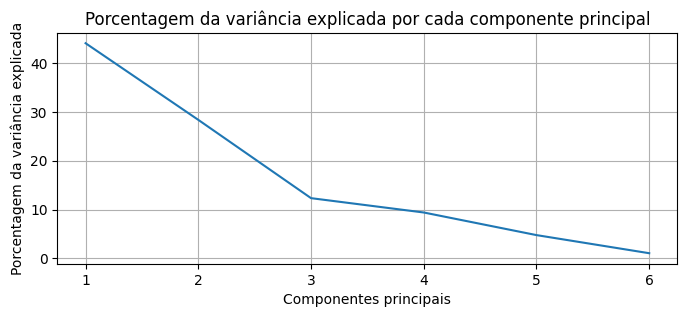

In [60]:
# Ao repassar a chamada sem componente ele irá gerar todos os componenentes possíveis
pca = PCA()

# Fit e Transform para o objeto PCA
# fit() = Encontra os componentes principais
# transform() = Projeta os dados nas direções desses componentes (vetores)
dados_pca_all = pca.fit_transform(dados_centralizados)

variancia_pca = pca.explained_variance_ratio_

soma_variancia = variancia_pca.cumsum()
print(soma_variancia)

componentes = [1,2,3,4,5,6]

dado_variancia = {
    'componentes': componentes,
    'variancia': variancia_pca
}

variancia = pd.DataFrame(dado_variancia)
variancia['variancia'] = 100 * variancia['variancia']

# Define o tamanho do plot
plt.figure(figsize=(8,3))

# Define as coordenadas x e y, respectivamente
plt.plot(variancia['componentes'], variancia['variancia'])

# Renomeia título da coordenada X
plt.xlabel('Componentes principais')

# Renomeia título da coordenada Y
plt.ylabel('Porcentagem da variância explicada')

# Renomeia título do plot
plt.title('Porcentagem da variância explicada por cada componente principal')

# Adiciona grade no plot
plt.grid(True)

# Exibe o plot graficamente
plt.show()

### Análise dos Componentes com a Variância Acumulada

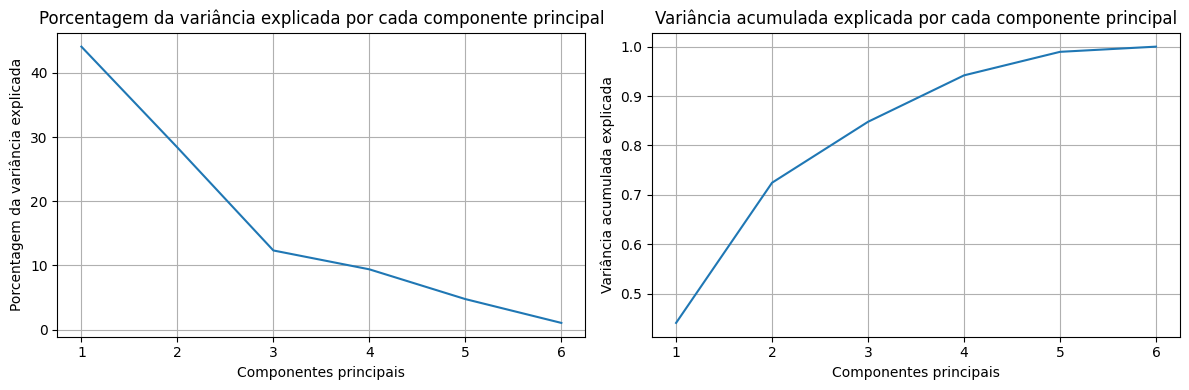

In [61]:
# Soma da explicação da variância de cada componente até chegar em 100% (1)
variancia['acumulado'] = soma_variancia

# Cria dois gráficos de tamanho fixo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(variancia['componentes'], variancia['variancia'])
ax1.set_xlabel('Componentes principais')
ax1.set_ylabel('Porcentagem da variância explicada')
ax1.set_title('Porcentagem da variância explicada por cada componente principal')
ax1.grid(True)

ax2.plot(variancia['componentes'], variancia['acumulado'])
ax2.set_xlabel('Componentes principais')
ax2.set_ylabel('Variância acumulada explicada')
ax2.set_title('Variância acumulada explicada por cada componente principal')
ax2.grid(True)

# Ajusta automaticamente espaço entre os elementos do gráfico
plt.tight_layout()
plt.show()